Referencing dependencies

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter, PercentFormatter
import seaborn as sns
%matplotlib inline

import functions as fn

In [24]:
df_sp = fn.prepare_enem_dataset("data-prepared/enem_2013_ES.csv")
df_sp.head()

,city1,state1,region,age,family_people_count,work_start_age,family_monthly_income_value,left_school
0,ALEGRE,ES,Southeast,34.0,3,18.0,1356,False
1,AFONSO CLAUDIO,ES,Southeast,19.0,3,18.0,678,False
2,VITORIA,ES,Southeast,19.0,4,NaN,1017,False
3,ARACRUZ,ES,Southeast,26.0,2,16.0,678,False
4,ALEGRE,ES,Southeast,21.0,4,19.0,2712,False


Let's explore our data, but first we need to concat all files into one single dataframe in order to see have the whole country view.

In [25]:
files_available = [
    "data-prepared/enem_2013_AC.csv",
    "data-prepared/enem_2013_AL.csv",
    "data-prepared/enem_2013_AM.csv",
    "data-prepared/enem_2013_AP.csv",
    "data-prepared/enem_2013_BA.csv",
    "data-prepared/enem_2013_CE.csv",
    "data-prepared/enem_2013_DF.csv",
    "data-prepared/enem_2013_ES.csv",
    "data-prepared/enem_2013_GO.csv",
    "data-prepared/enem_2013_MA.csv",
    "data-prepared/enem_2013_MG.csv",
    "data-prepared/enem_2013_MS.csv",
    "data-prepared/enem_2013_MT.csv",
    "data-prepared/enem_2013_PA.csv",
    "data-prepared/enem_2013_PB.csv",
    "data-prepared/enem_2013_PE.csv",
    "data-prepared/enem_2013_PI.csv",
    "data-prepared/enem_2013_PR.csv",
    "data-prepared/enem_2013_RJ.csv",
    "data-prepared/enem_2013_RN.csv",
    "data-prepared/enem_2013_RO.csv",
    "data-prepared/enem_2013_RR.csv",
    "data-prepared/enem_2013_RS.csv",
    "data-prepared/enem_2013_SC.csv",
    "data-prepared/enem_2013_SE.csv",
    "data-prepared/enem_2013_SP.csv",
    "data-prepared/enem_2013_TO.csv"
]

df = fn.prepare_enem_dataset(files_available.pop())

for f in files_available:
    df_to_concat = fn.prepare_enem_dataset(f)
    df = pd.concat([df, df_to_concat])

df.head()

,city1,state1,region,age,family_people_count,work_start_age,family_monthly_income_value,left_school
0,PALMAS,TO,North,18.0,4,15.0,678,False
1,ARAGUAINA,TO,North,46.0,3,15.0,2712,False
2,PALMAS,TO,North,15.0,5,NaN,678,False
3,ARAGUAINA,TO,North,26.0,3,21.0,1356,False
4,PALMAS,TO,North,44.0,2,13.0,1017,False


In [26]:
# check if all the states has been imported
states = df["state1"].unique()
states

array(['TO', 'AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA',
       'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO',
       'RR', 'RS', 'SC', 'SE', 'SP'], dtype=object)

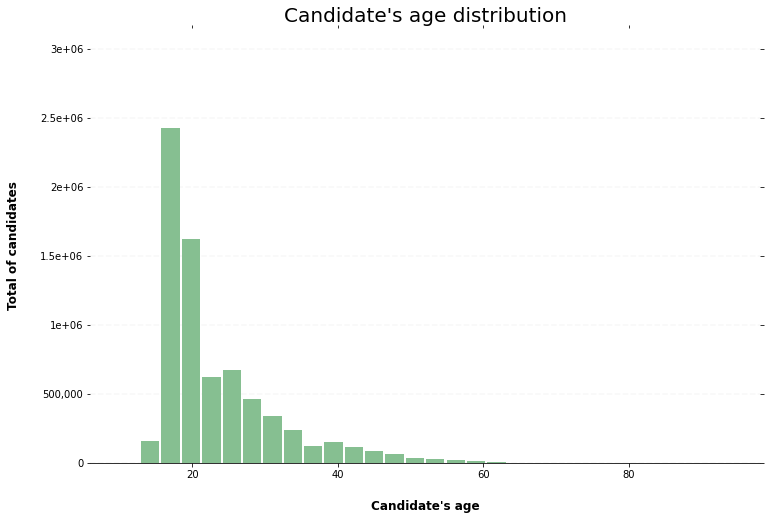

In [27]:

fn.plot_histogram(df, "age", 30, "Candidate's age", "Total of candidates", "Candidate's age distribution")

Let's see the candidate's age distribution per state

In [28]:
regions = {
    "North": ["AC", "AP", "AM", "PA", "RO", "RR", "TO"],
    "Northeast": ["AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE"],
    "Midwest": ["MT", "GO", "DF", "MS"],
    "Southeast": ["SP", "MG", "RJ", "ES"],
    "South": ["PR", "SC", "RS"],
}

def get_region(state):
    for region in regions.keys():
        if state in regions[region]:
            return region

df["region"] = df.apply(lambda row: get_region(row.state1), axis=1)

Avg drop age in North: 31.32372711117979
Avg start working age in North: 27.159375516310313
Avg drop age in Northeast: 31.377592752947447
Avg start working age in Northeast: 26.92474702811523
Avg drop age in Midwest: 31.96077681048503
Avg start working age in Midwest: 25.671009644225002
Avg drop age in Southeast: 34.31571629908963
Avg start working age in Southeast: 25.502483205174308
Avg drop age in South: 32.669882018369776
Avg start working age in South: 24.953451690655772


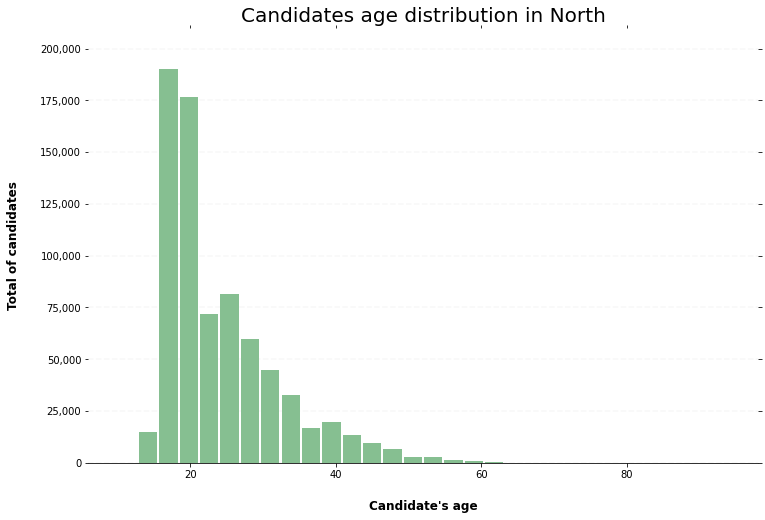

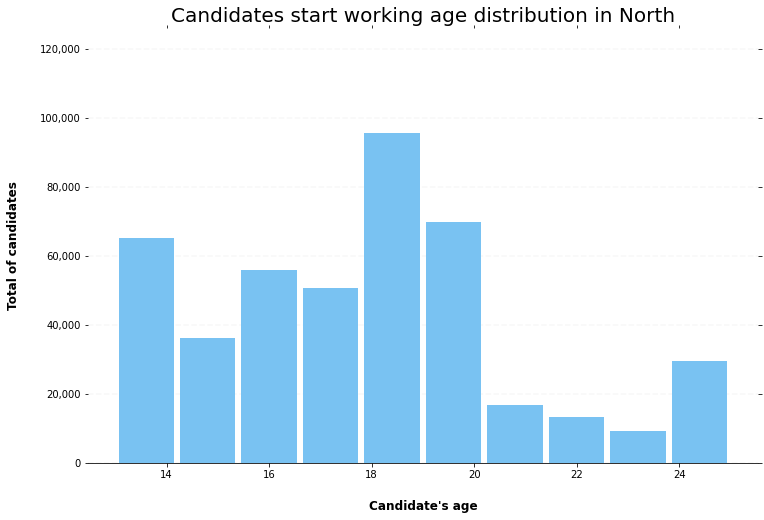

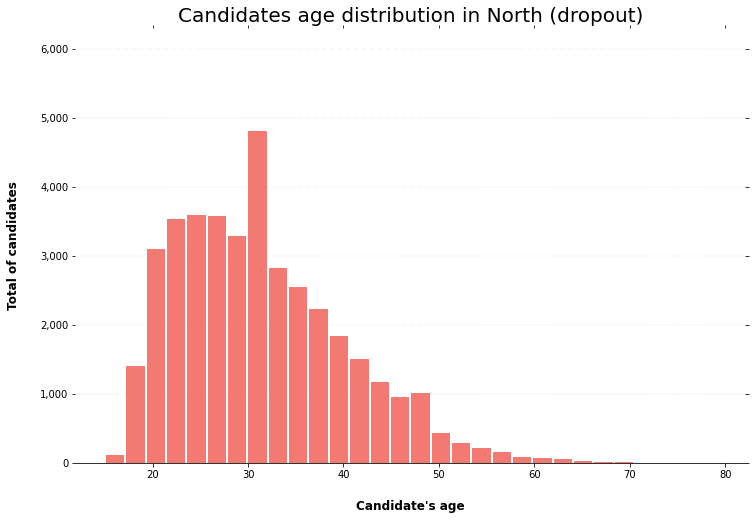

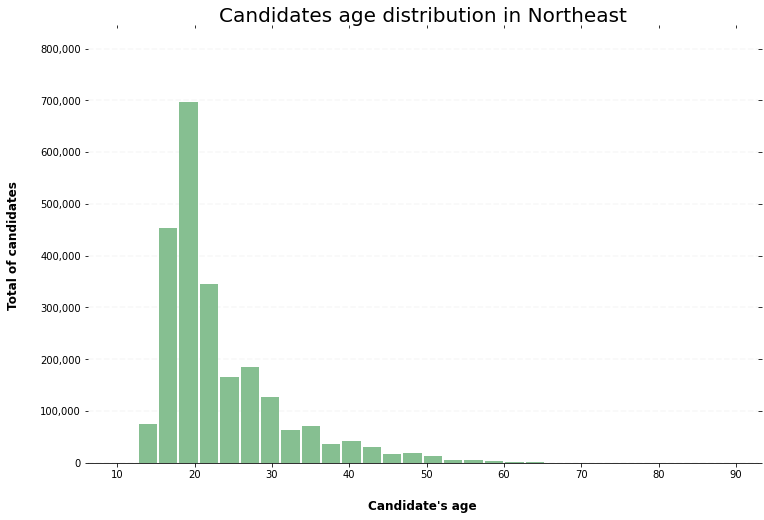

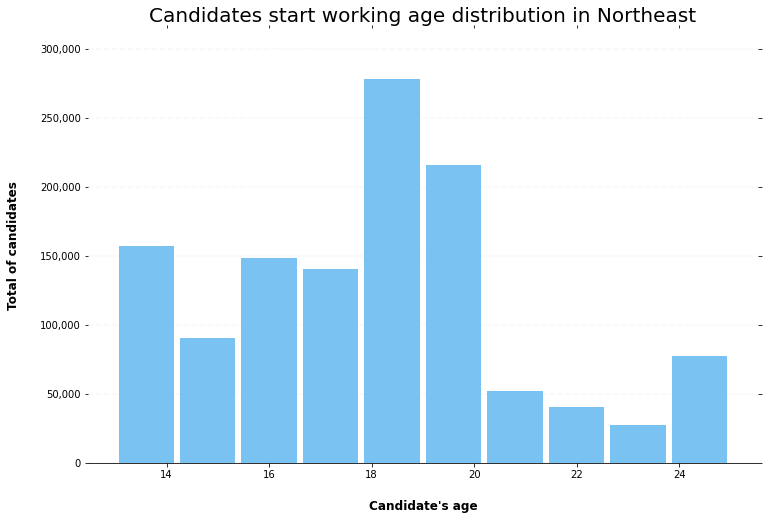

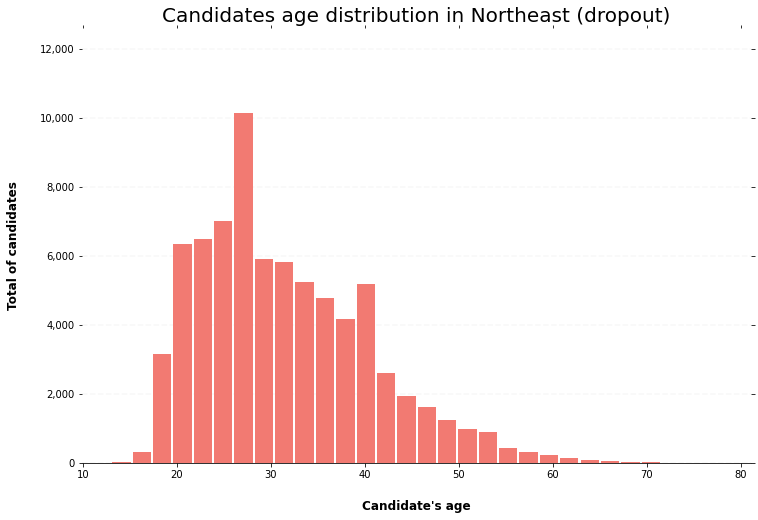

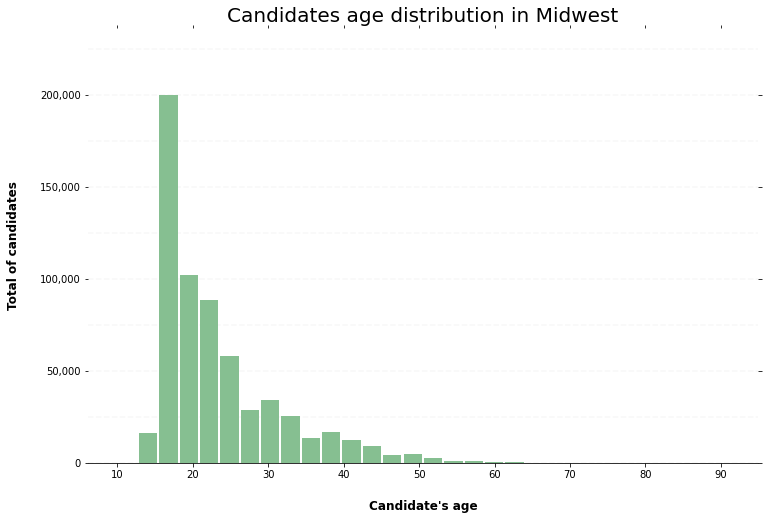

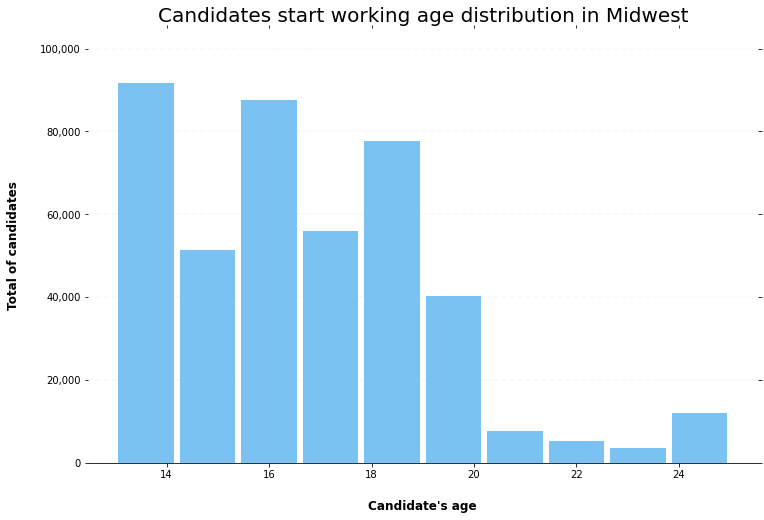

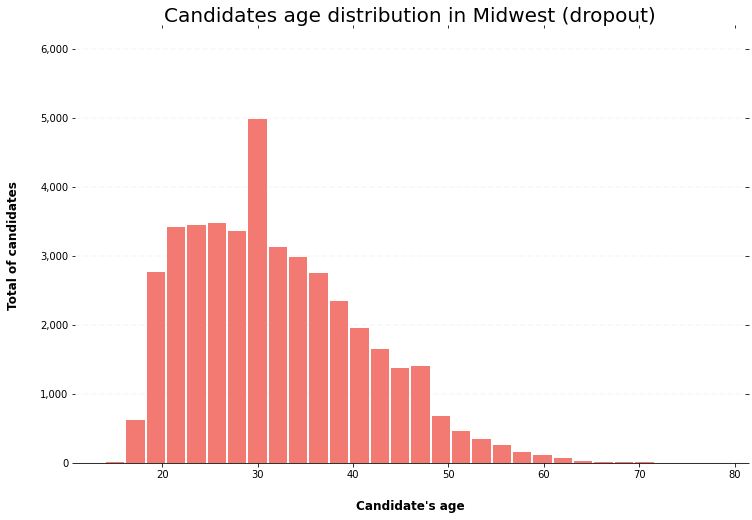

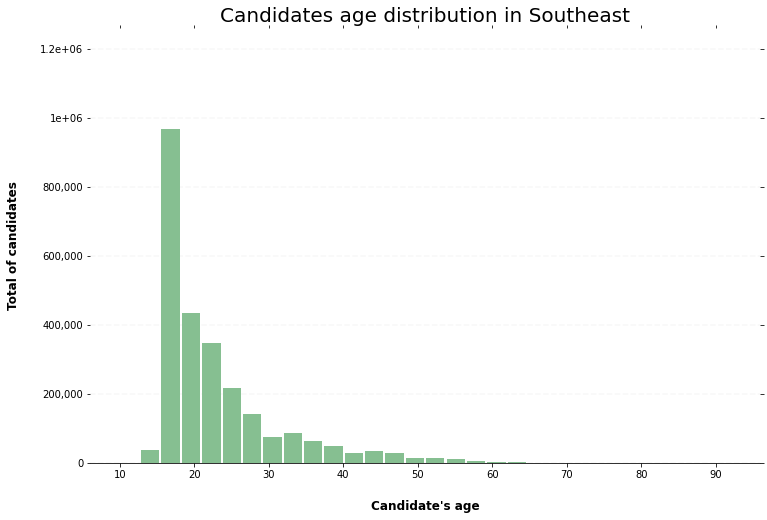

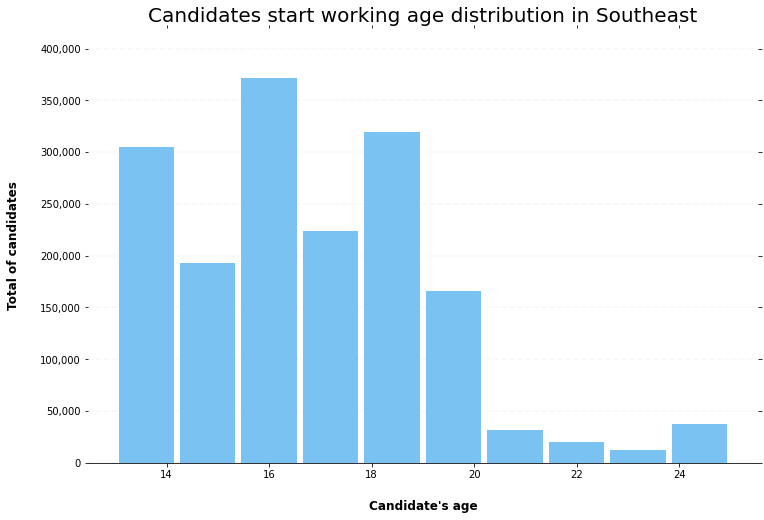

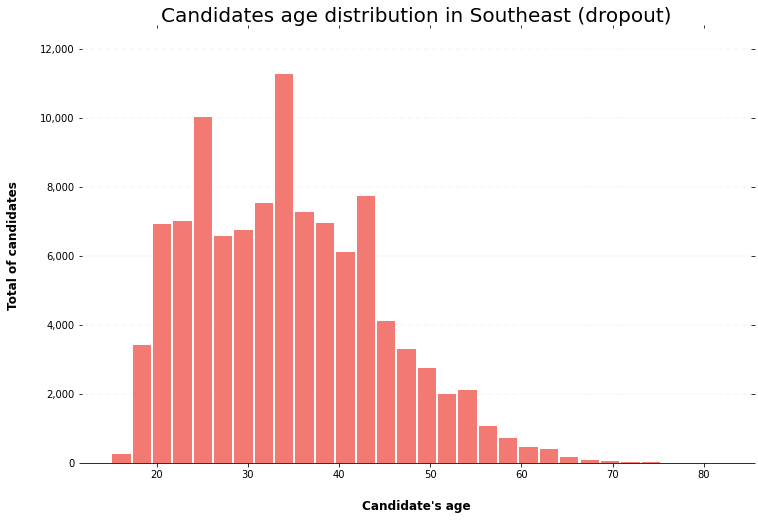

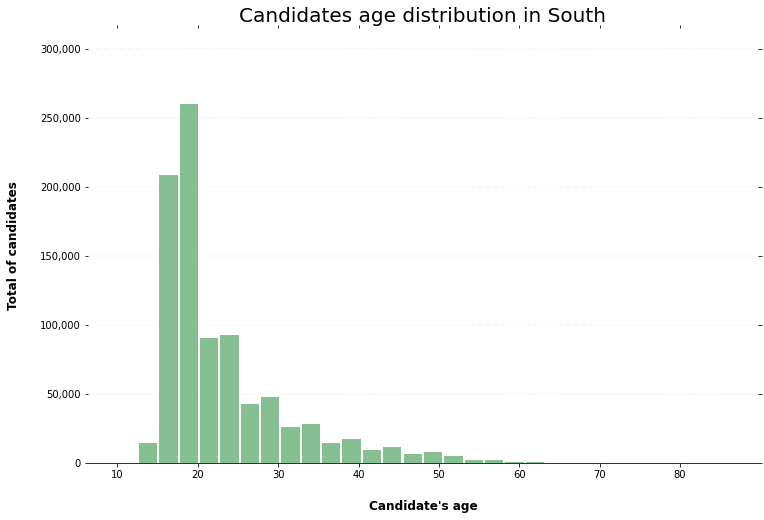

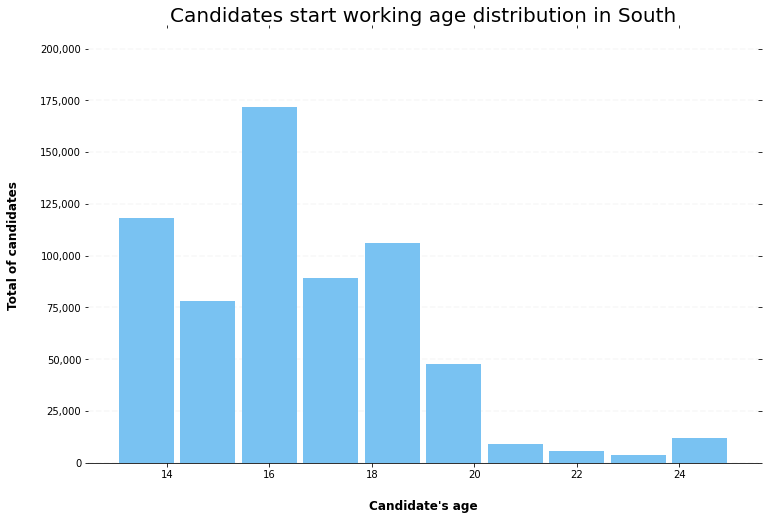

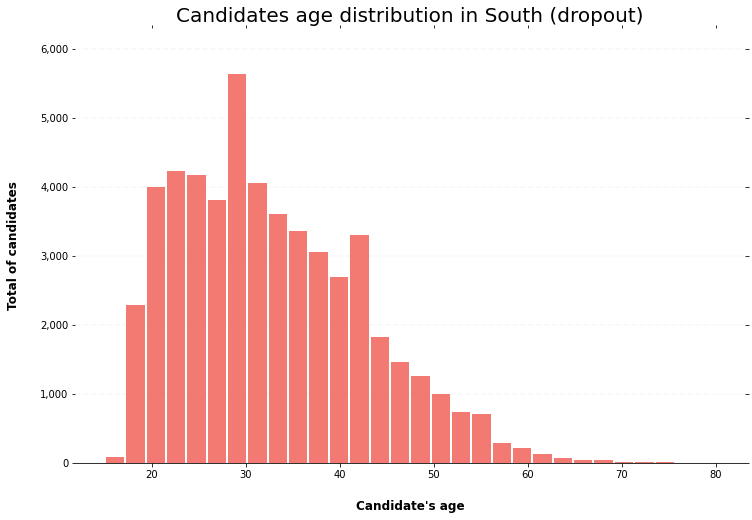

In [29]:
for region in regions.keys():
    states = regions[region]
    df_state = df.loc[df.state1.isin(states)]
    df_state_dropout = df.loc[df.state1.isin(states) & df.left_school == True]
    print(f"Avg drop age in {region}: {df_state_dropout.age.mean()}")
    df_state_work = df.loc[df.state1.isin(states) & df.work_start_age.notnull()]
    print(f"Avg start working age in {region}: {df_state_work.age.mean()}")
    fn.plot_histogram(df_state, "age", 30, "Candidate's age", "Total of candidates", f"Candidates age distribution in {region}")
    fn.plot_histogram(df_state_work, "work_start_age", None, "Candidate's age", "Total of candidates", f"Candidates start working age distribution in {region}", "#79c2f2")
    fn.plot_histogram(df_state_dropout, "age", 30, "Candidate's age", "Total of candidates", f"Candidates age distribution in {region} (dropout)", "#f27a72")

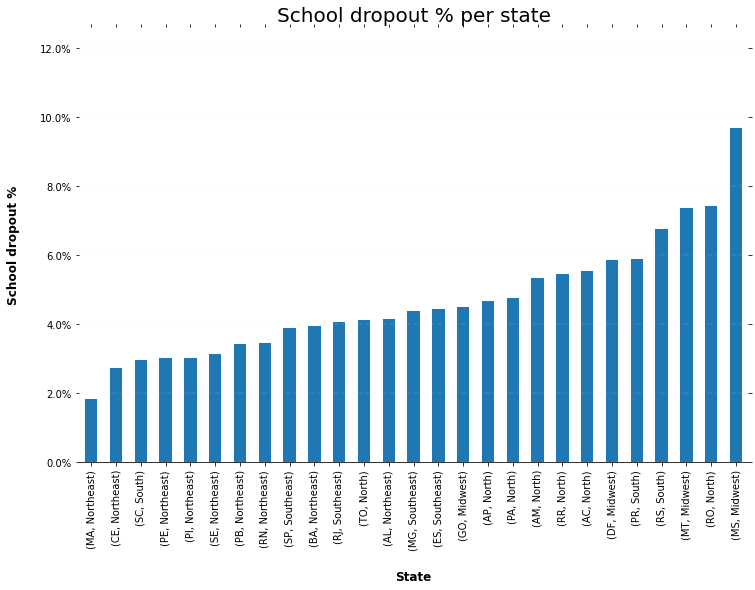

In [30]:
df1 = df.groupby(["state1", "region"]).apply(lambda row: row[row["left_school"] == True].count() / row.shape[0])["city1"].rename("school_dropout_rate").sort_values()

fn.plot_bar(df1, xlabel="State", ylabel="School dropout %", title="School dropout % per state")


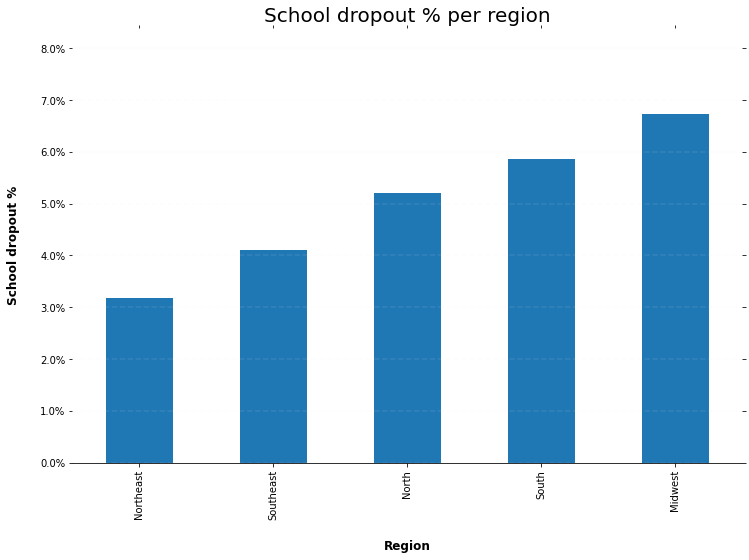

In [31]:
df1 = df.groupby(["region"]).apply(lambda row: row[row["left_school"] == True].count() / row.shape[0])["city1"].rename("school_dropout_rate").sort_values()

fn.plot_bar(df1, xlabel="Region", ylabel="School dropout %", title="School dropout % per region")

In [32]:
df["left_school"].sum() / df.shape[0]

0.04359981225508161

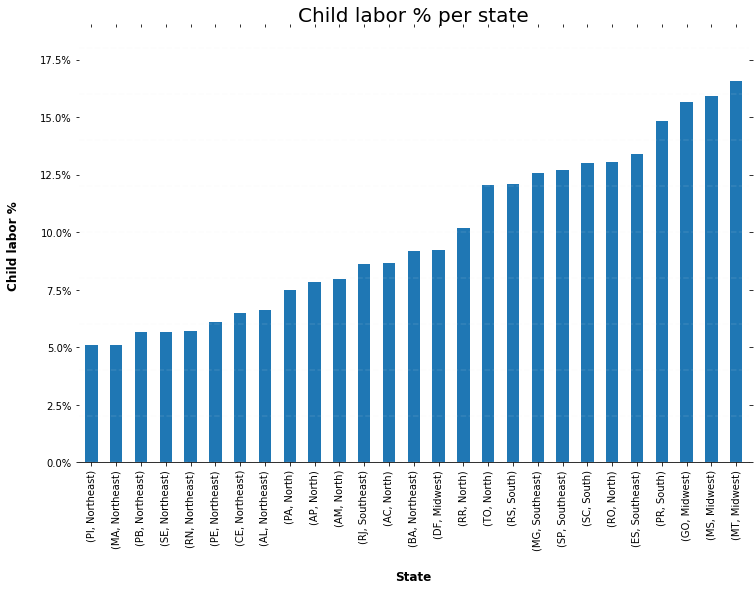

In [33]:
# child labor in brazil is 14 years old

child_labor_state = df.groupby(["state1", "region"]).apply(lambda row: row[row["work_start_age"] <= 14].count() / row.shape[0])["city1"].rename("school_dropout_rate").sort_values()

fn.plot_bar(child_labor_state, xlabel="State", ylabel="Child labor %", title="Child labor % per state")


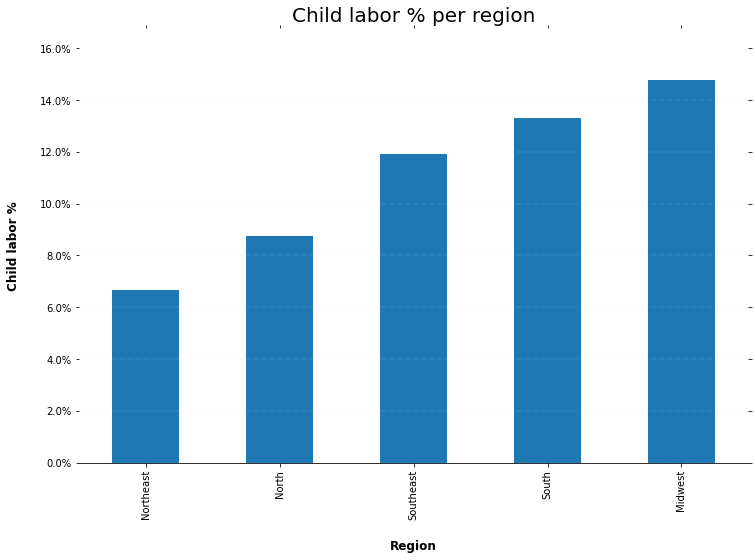

In [34]:
# child labor in brazil is 14 years old

child_labor_region = df.groupby(["region"]).apply(lambda row: row[row["work_start_age"] <= 14].count() / row.shape[0])["city1"].rename("school_dropout_rate").sort_values()

fn.plot_bar(child_labor_region, xlabel="Region", ylabel="Child labor %", title="Child labor % per region")


In [35]:
df.loc[df.work_start_age <= 14].count() / df.shape[0]

city1                          0.102714
state1                         0.102714
region                         0.102714
age                            0.102712
family_people_count            0.102714
work_start_age                 0.102714
family_monthly_income_value    0.102714
left_school                    0.102714
dtype: float64

The Brazilian school dropout rate based on ENEM candidates answers is 4,3% and the child labor rate among those candidates is 10,2%

Now, I need to create a function to score the infrastructure of the schools. For this, I'll use a second data source.

In [36]:
columns = [
    "state",                    # school's state
    "city",                     # school's city 
    "is_active",                # is school active?
    "directors_room",           # has directors room
    "teachers_room",            # has teachers room
    "secretary",                # has secretary
    "meals_room",               # has a place for meal
    "auditorium",               # has auditorium
    "computers_lab",           # has computer room
    "science_lab",             # has science lab
    "sports_pitch",             # has sports pitch
    "sports_pitch_open_air",    # has sports pitch open air
    "kindengarden",             # has kindengarden
    "library",                  # has library
    "bathroom_in",              # has bathroom in the building
    "bathroom_out",             # has bathroom outside the building
    "meal",                     # offers meal
    "no_water",           # has filtered water
    "no_electricity",           # has electricity
    "no_sewage",                # has sewage collection
    "internet",                 # has internet connection
    "computer",                # has computers
    "dvr",                      # has DVR
    "printer",                  # has printers
    "copy",                     # has copy machines,
    "_"
]

df_infrastructure = pd.read_csv("data-prepared/school_infrastructure_2012.csv", sep=";", skiprows=1, names=columns, encoding="UTF-8")

# filtering only active schools
df_infrastructure = df_infrastructure.loc[df_infrastructure["is_active"] == "Em Atividade"]
df_infrastructure.head()


# "Sim" = yes
# creating opposite columns
df_infrastructure["electricity"] = df_infrastructure.apply(lambda row: "Sim" if row["no_electricity"] != "Sim" else "Não", axis=1)
df_infrastructure["sewage"] = df_infrastructure.apply(lambda row: "Sim" if row["no_sewage"] != "Sim" else "Não", axis=1)
df_infrastructure["water"] = df_infrastructure.apply(lambda row: "Sim" if row["no_water"] != "Sim" else "Não", axis=1)

# joining some columns into one
df_infrastructure["sports_pitch_any"] = df_infrastructure.apply(lambda row: "Sim" if (row["sports_pitch"] == "Sim" and row["sports_pitch_open_air"]) else "Não", axis=1)
df_infrastructure["bathroom_any"] = df_infrastructure.apply(lambda row: "Sim" if (row["bathroom_in"] == "Sim" and row["bathroom_out"]) else "Não", axis=1)

df_infrastructure.head()

,state,city,is_active,directors_room,teachers_room,secretary,meals_room,auditorium,computers_lab,science_lab,...,computer,dvr,printer,copy,_,electricity,sewage,water,sports_pitch_any,bathroom_any
0,Mato Grosso do Sul,CORUMBA,Em Atividade,Sim,Sim,Sim,N�o,Sim,Sim,Sim,...,Sim,Sim,Sim,Sim,NaN,Sim,Sim,Sim,Sim,Sim
1,Mato Grosso do Sul,CORUMBA,Em Atividade,Sim,Sim,N�o,N�o,N�o,Sim,Sim,...,Sim,Sim,Sim,Sim,NaN,Sim,Sim,Sim,Sim,Sim
2,Mato Grosso do Sul,CORUMBA,Em Atividade,Sim,Sim,Sim,N�o,N�o,Sim,N�o,...,Sim,Sim,Sim,Sim,NaN,Sim,Sim,Sim,Sim,Sim
3,Mato Grosso do Sul,CORUMBA,Em Atividade,Sim,Sim,Sim,N�o,N�o,Sim,N�o,...,Sim,Sim,Sim,Sim,NaN,Sim,Sim,Sim,Não,Sim
4,Mato Grosso do Sul,CORUMBA,Em Atividade,Sim,Sim,Sim,N�o,N�o,Sim,N�o,...,Sim,Sim,Sim,Sim,NaN,Sim,Sim,Sim,Sim,Sim


In [37]:

# "Sim" = yes

def infrastructure_score(school):
    basic_features = ["directors_room", "bathroom_any", "water", "electricity", "sewage", "meal", "computer", "printer", "dvr"]
    advanced_features = ["teachers_room", "library", "computers_lab", "science_lab", "sports_pitch_any", "kindengarden"]

    score = 0

    for column in basic_features:
        if school[column] == "Sim":
            score += 5

    for column in advanced_features:
        if school[column] == "Sim":
            score += 2

    return score
        
df_infrastructure["infrastructure_score"] = df_infrastructure.apply(lambda row: infrastructure_score(row), axis=1)

In [38]:
df_infrastructure.sort_values(by="infrastructure_score", ascending=False).head()

,state,city,is_active,directors_room,teachers_room,secretary,meals_room,auditorium,computers_lab,science_lab,...,dvr,printer,copy,_,electricity,sewage,water,sports_pitch_any,bathroom_any,infrastructure_score
236234,Rio Grande do Sul,SANTO ANGELO,Em Atividade,Sim,Sim,Sim,Sim,N�o,Sim,Sim,...,Sim,Sim,N�o,NaN,Sim,Sim,Sim,Sim,Sim,57
237185,Rio Grande do Sul,TAPERA,Em Atividade,Sim,Sim,Sim,N�o,N�o,Sim,Sim,...,Sim,Sim,Sim,NaN,Sim,Sim,Sim,Sim,Sim,57
187105,S�o Paulo,MAUA,Em Atividade,Sim,Sim,Sim,Sim,Sim,Sim,Sim,...,Sim,Sim,Sim,NaN,Sim,Sim,Sim,Sim,Sim,57
147252,Rio de Janeiro,RIO DE JANEIRO,Em Atividade,Sim,Sim,Sim,Sim,Sim,Sim,Sim,...,Sim,Sim,Sim,NaN,Sim,Sim,Sim,Sim,Sim,57
234643,Rio Grande do Sul,PEJUCARA,Em Atividade,Sim,Sim,Sim,Sim,N�o,Sim,Sim,...,Sim,Sim,N�o,NaN,Sim,Sim,Sim,Sim,Sim,57


In order to join both datasets, I need to map ```state``` values to its short version.

Let's see the options.

In [39]:
df_infrastructure["state"].unique()

array(['Mato Grosso do Sul', 'Mato Grosso', 'Goias', 'Distrito Federal',
       'Maranhao', 'Piaui', 'Ceara', 'Rio Grande do Norte', 'Paraiba',
       'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Rondonia', 'Acre',
       'Amazonas', 'Roraima', 'Para', 'Amapa', 'Tocantins',
       'Espirito Santo', 'Rio de Janeiro', 'Minas Gerais', 'S�o Paulo',
       'Paran�', 'Santa Catarina', 'Rio Grande do Sul'], dtype=object)

In [40]:
def map_uf(val):
    if val == "Mato Grosso do Sul":
        return "MS"
    if val == "Mato Grosso":
        return "MT"
    if val == "Goias":
        return "GO"
    if val == "Distrito Federal":
        return "DF"
    if val == "Maranhao":
        return "MA"
    if val == "Piaui":
        return "PI"
    if val == "Ceara":
        return "CE"
    if val == "Rio Grande do Norte":
        return "RN"
    if val == "Paraiba":
        return "PB"
    if val == "Pernambuco":
        return "PE"
    if val == "Alagoas":
        return "AL"
    if val == "Sergipe":
        return "SE"
    if val == "Bahia":
        return "BA"
    if val == "Rondonia":
        return "RO"
    if val == "Acre":
        return "AC"
    if val == "Amazonas":
        return "AM"
    if val == "Roraima":
        return "RR"
    if val == "Para":
        return "PA"
    if val == "Amapa":
        return "AP"
    if val == "Tocantins":
        return "TO"
    if val == "Espirito Santo":
        return "ES"
    if val == "Rio de Janeiro":
        return "RJ"
    if val == "Minas Gerais":
        return "MG"
    if val == "S�o Paulo":
        return "SP"
    if val == "Paran�":
        return "PR"
    if val == "Santa Catarina":
        return "SC"
    if val == "Rio Grande do Sul":
        return "RS"

In [41]:
df_infrastructure["state_code"] = df_infrastructure.apply(lambda row: map_uf(row["state"]), axis=1)

regions = {
    "North": ["AC", "AP", "AM", "PA", "RO", "RR", "TO"],
    "Northeast": ["AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE"],
    "Midwest": ["MT", "GO", "DF", "MS"],
    "Southeast": ["SP", "MG", "RJ", "ES"],
    "South": ["PR", "SC", "RS"],
}

def get_region(state):
    for region in regions.keys():
        if state in regions[region]:
            return region

df_infrastructure["region"] = df_infrastructure.apply(lambda row: get_region(row.state_code), axis=1)

df_infrastructure.head()

,state,city,is_active,directors_room,teachers_room,secretary,meals_room,auditorium,computers_lab,science_lab,...,copy,_,electricity,sewage,water,sports_pitch_any,bathroom_any,infrastructure_score,state_code,region
0,Mato Grosso do Sul,CORUMBA,Em Atividade,Sim,Sim,Sim,N�o,Sim,Sim,Sim,...,Sim,NaN,Sim,Sim,Sim,Sim,Sim,52,MS,Midwest
1,Mato Grosso do Sul,CORUMBA,Em Atividade,Sim,Sim,N�o,N�o,N�o,Sim,Sim,...,Sim,NaN,Sim,Sim,Sim,Sim,Sim,55,MS,Midwest
2,Mato Grosso do Sul,CORUMBA,Em Atividade,Sim,Sim,Sim,N�o,N�o,Sim,N�o,...,Sim,NaN,Sim,Sim,Sim,Sim,Sim,50,MS,Midwest
3,Mato Grosso do Sul,CORUMBA,Em Atividade,Sim,Sim,Sim,N�o,N�o,Sim,N�o,...,Sim,NaN,Sim,Sim,Sim,Não,Sim,48,MS,Midwest
4,Mato Grosso do Sul,CORUMBA,Em Atividade,Sim,Sim,Sim,N�o,N�o,Sim,N�o,...,Sim,NaN,Sim,Sim,Sim,Sim,Sim,48,MS,Midwest


And I'll save all this steps into a function to be called easier later on.

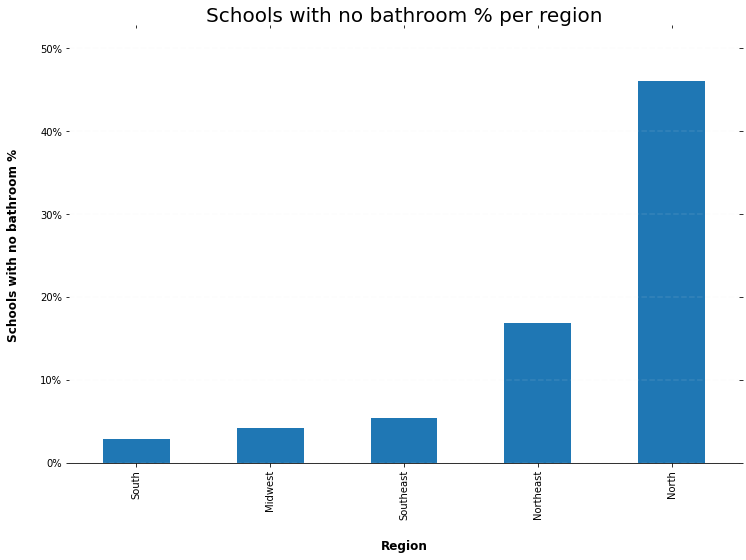

In [42]:
# school without any bathroom %
# "Sim" = yes

schools_with_no_bathroom = df_infrastructure.groupby(["region"]).apply(lambda row: row[row["bathroom_any"] != "Sim"].count() / row.shape[0])["city"].rename("schools_with_no_bathroom").sort_values()

fn.plot_bar(schools_with_no_bathroom, xlabel="Region", ylabel="Schools with no bathroom %", title="Schools with no bathroom % per region")


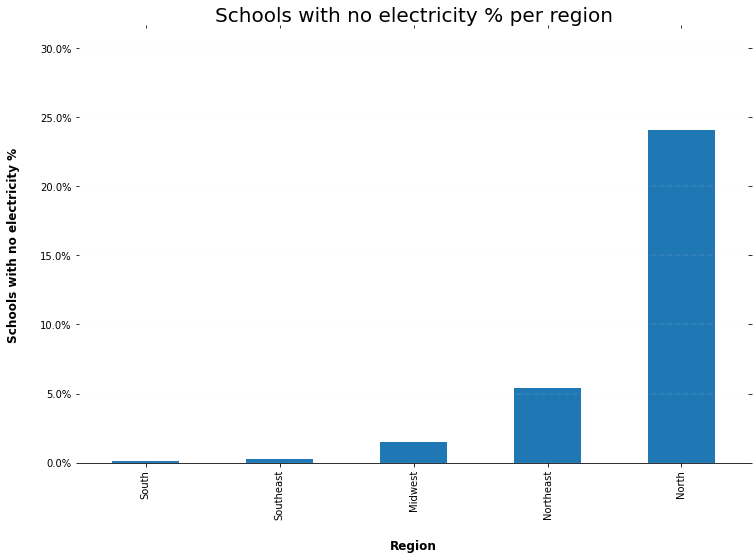

In [43]:
# school without electricity %
# "Sim" = yes

schools_with_no_electricity = df_infrastructure.groupby(["region"]).apply(lambda row: row[row["electricity"] != "Sim"].count() / row.shape[0])["city"].rename("schools_with_no_bathroom").sort_values()

fn.plot_bar(schools_with_no_electricity, xlabel="Region", ylabel="Schools with no electricity %", title="Schools with no electricity % per region")

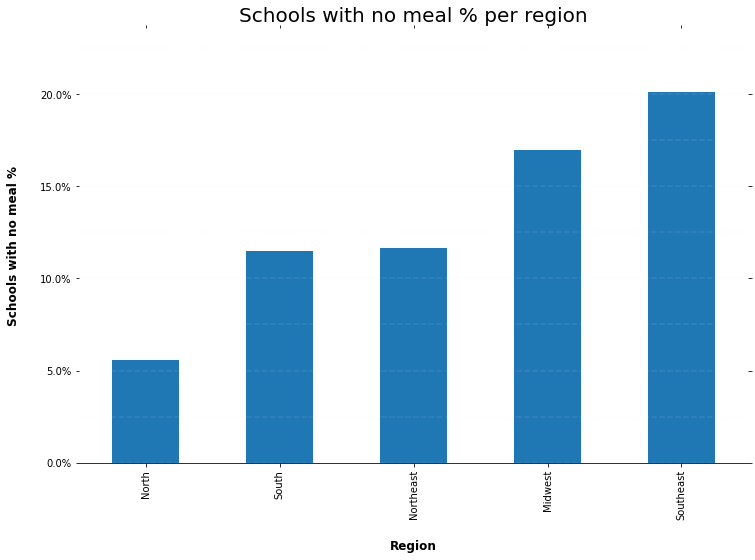

In [44]:
# school without meal %
# "Sim" = yes

schools_with_no_meal = df_infrastructure.groupby(["region"]).apply(lambda row: row[row["meal"] != "Sim"].count() / row.shape[0])["city"].rename("schools_with_no_bathroom").sort_values()

fn.plot_bar(schools_with_no_meal, xlabel="Region", ylabel="Schools with no meal %", title="Schools with no meal % per region")

In [45]:
df_infrastructure.columns

Index(['state', 'city', 'is_active', 'directors_room', 'teachers_room',
       'secretary', 'meals_room', 'auditorium', 'computers_lab', 'science_lab',
       'sports_pitch', 'sports_pitch_open_air', 'kindengarden', 'library',
       'bathroom_in', 'bathroom_out', 'meal', 'no_water', 'no_electricity',
       'no_sewage', 'internet', 'computer', 'dvr', 'printer', 'copy', '_',
       'electricity', 'sewage', 'water', 'sports_pitch_any', 'bathroom_any',
       'infrastructure_score', 'state_code', 'region'],
      dtype='object')

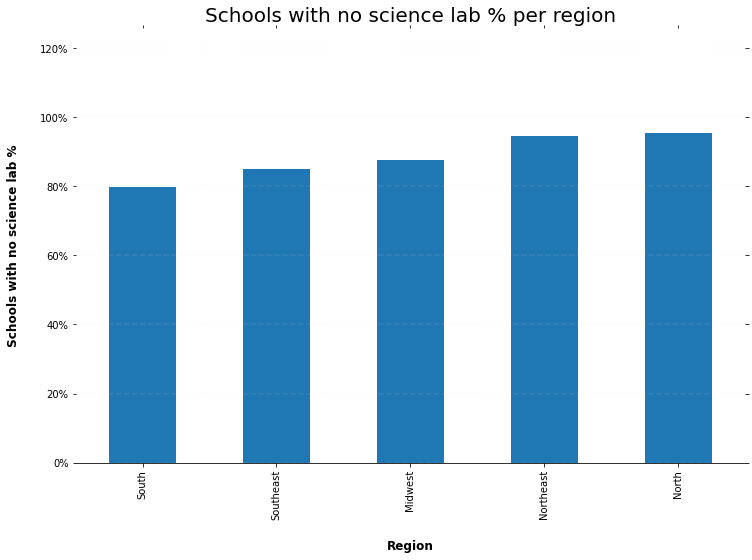

In [46]:
df1 = df_infrastructure.groupby(["region"]).apply(lambda row: row[row["science_lab"] != "Sim"].count() / row.shape[0])["city"].rename("schools_with_no_bathroom").sort_values()

fn.plot_bar(df1, xlabel="Region", ylabel="Schools with no science lab %", title="Schools with no science lab % per region")

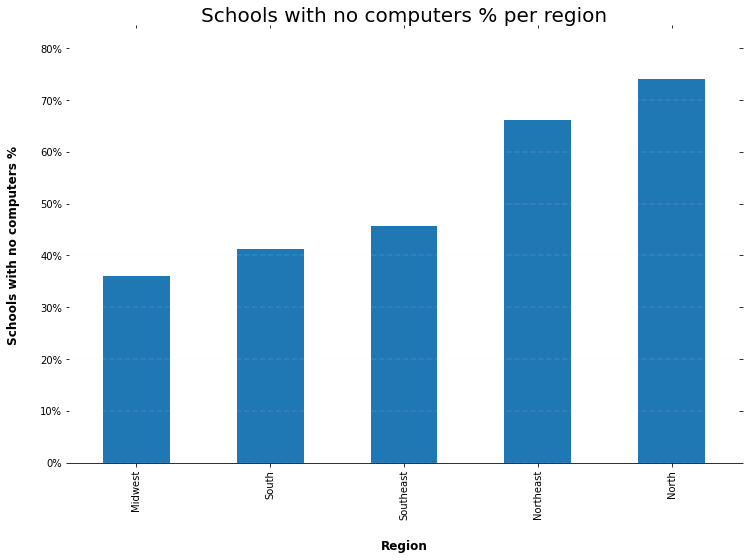

In [47]:
df1 = df_infrastructure.groupby(["region"]).apply(lambda row: row[row["computers_lab"] != "Sim"].count() / row.shape[0])["city"].rename("schools_with_no_bathroom").sort_values()

fn.plot_bar(df1, xlabel="Region", ylabel="Schools with no computers %", title="Schools with no computers % per region")

In [48]:
df_infrastructure.loc[df_infrastructure.water != "Sim"].groupby(["region"]).apply(lambda row: row[row["meal"] == "Sim"].count() / row.shape[0])["city"].rename("schools_with_no_bathroom").sort_values()

region
Southeast    0.984293
South        0.992126
Northeast    0.997337
North        0.999443
Midwest      1.000000
Name: schools_with_no_bathroom, dtype: float64

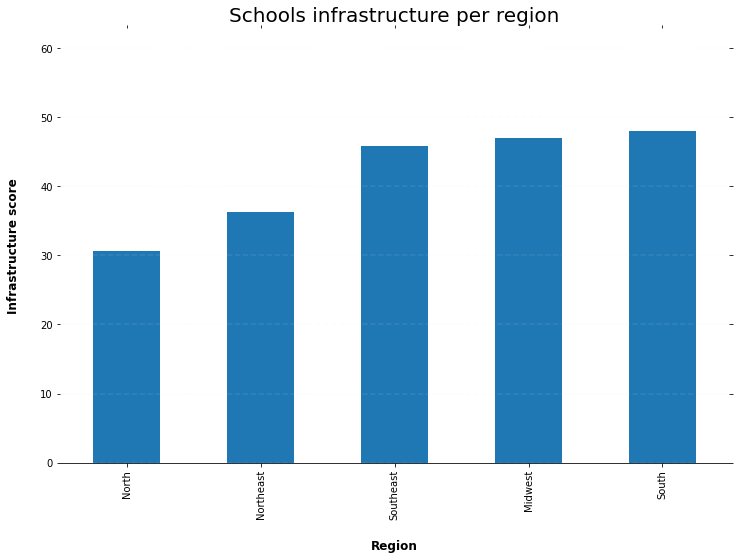

In [49]:
df1 = df_infrastructure.groupby(["region"]).apply(lambda row: row["infrastructure_score"].sum() / row.shape[0]).rename("score").sort_values()

fn.plot_bar(df1, xlabel="Region", ylabel="Infrastructure score", title="Schools infrastructure per region", yformatter="number")

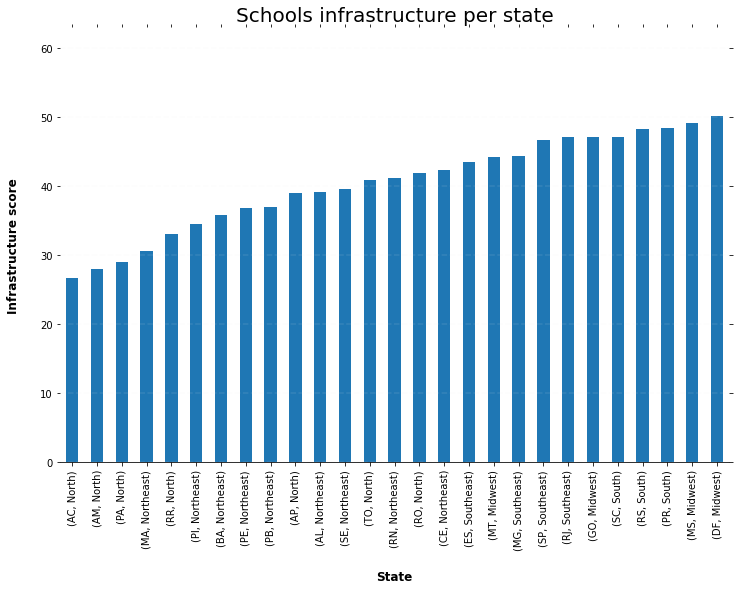

In [50]:
df1 = df_infrastructure.groupby(["state_code", "region"]).apply(lambda row: row["infrastructure_score"].sum() / row.shape[0]).rename("score").sort_values()

fn.plot_bar(df1, xlabel="State", ylabel="Infrastructure score", title="Schools infrastructure per state", yformatter="number")

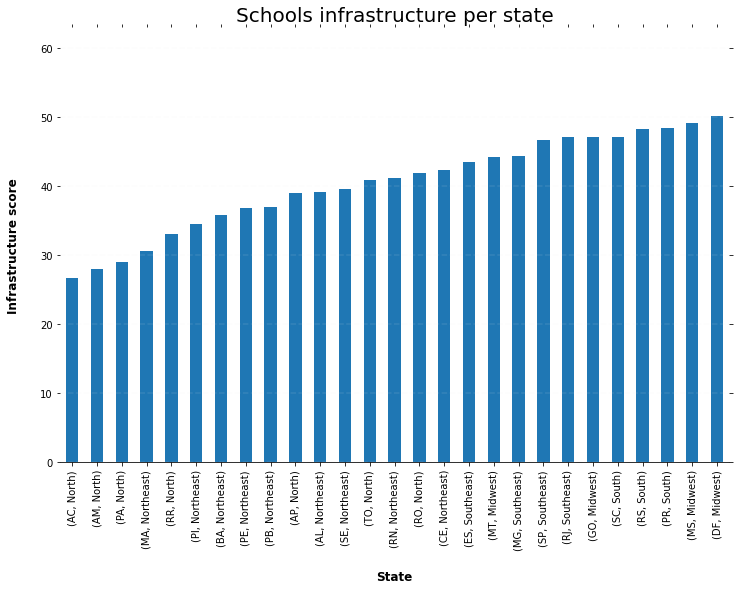

In [51]:
df1 = df_infrastructure.groupby(["state_code", "region"]).apply(lambda row: row["infrastructure_score"].sum() / row.shape[0]).rename("score").sort_values()

fn.plot_bar(df1, xlabel="State", ylabel="Infrastructure score", title="Schools infrastructure per state", yformatter="number")

Now it's time for answers!

1. Is school dropout rate higher in schools with less infrastructure?

To answer such a question, I'll relate school dropout rate and infrastructure score for all the cities, joining them by name.


In [52]:
df.columns

Index(['city1', 'state1', 'region', 'age', 'family_people_count',
       'work_start_age', 'family_monthly_income_value', 'left_school'],
      dtype='object')

In [53]:
df_infrastructure.columns

Index(['state', 'city', 'is_active', 'directors_room', 'teachers_room',
       'secretary', 'meals_room', 'auditorium', 'computers_lab', 'science_lab',
       'sports_pitch', 'sports_pitch_open_air', 'kindengarden', 'library',
       'bathroom_in', 'bathroom_out', 'meal', 'no_water', 'no_electricity',
       'no_sewage', 'internet', 'computer', 'dvr', 'printer', 'copy', '_',
       'electricity', 'sewage', 'water', 'sports_pitch_any', 'bathroom_any',
       'infrastructure_score', 'state_code', 'region'],
      dtype='object')

In [56]:
# preparing for join
df["state"] = df["state1"]
df["city"] = df["city1"]

df["state_city"] = df["state1"] + "-" + df["city1"]

df_infrastructure["state_city"] = df_infrastructure["state_code"] + "-" + df_infrastructure["city"]

,state,city,is_active,directors_room,teachers_room,secretary,meals_room,auditorium,computers_lab,science_lab,...,_,electricity,sewage,water,sports_pitch_any,bathroom_any,infrastructure_score,state_code,region,state_city
0,Mato Grosso do Sul,CORUMBA,Em Atividade,Sim,Sim,Sim,N�o,Sim,Sim,Sim,...,NaN,Sim,Sim,Sim,Sim,Sim,52,MS,Midwest,MS-CORUMBA
1,Mato Grosso do Sul,CORUMBA,Em Atividade,Sim,Sim,N�o,N�o,N�o,Sim,Sim,...,NaN,Sim,Sim,Sim,Sim,Sim,55,MS,Midwest,MS-CORUMBA
2,Mato Grosso do Sul,CORUMBA,Em Atividade,Sim,Sim,Sim,N�o,N�o,Sim,N�o,...,NaN,Sim,Sim,Sim,Sim,Sim,50,MS,Midwest,MS-CORUMBA
3,Mato Grosso do Sul,CORUMBA,Em Atividade,Sim,Sim,Sim,N�o,N�o,Sim,N�o,...,NaN,Sim,Sim,Sim,Não,Sim,48,MS,Midwest,MS-CORUMBA
4,Mato Grosso do Sul,CORUMBA,Em Atividade,Sim,Sim,Sim,N�o,N�o,Sim,N�o,...,NaN,Sim,Sim,Sim,Sim,Sim,48,MS,Midwest,MS-CORUMBA


In [64]:
df_school_dropout = df.groupby(["state_city"]).apply(lambda row: row[row["left_school"] == True].count() / row.shape[0])["city1"].rename("school_dropout_rate").to_frame()
df_school_dropout.head()

,school_dropout_rate
state_city,
AC-ACRELANDIA,0.056180
AC-ASSIS BRASIL,0.024096
AC-BRASILEIA,0.052707
AC-BUJARI,0.056133
AC-CAPIXABA,0.039855


In [69]:
df_school_infrastructure = df_infrastructure.groupby(["state_city"]).apply(lambda row: row["infrastructure_score"].sum() / row.shape[0]).rename("infrastructure_score").to_frame()
df_school_infrastructure.head()

,infrastructure_score
state_city,
AC-ACRELANDIA,38.294118
AC-ASSIS BRASIL,14.915254
AC-BRASILEIA,24.169014
AC-BUJARI,22.195122
AC-CAPIXABA,28.545455


In [105]:
df_answer1 = df_school_dropout.join(df_school_infrastructure).loc[df_school_dropout["school_dropout_rate"] > 0].sort_values(by="infrastructure_score", ascending=True).dropna()

<AxesSubplot:xlabel='infrastructure_score', ylabel='school_dropout_rate'>

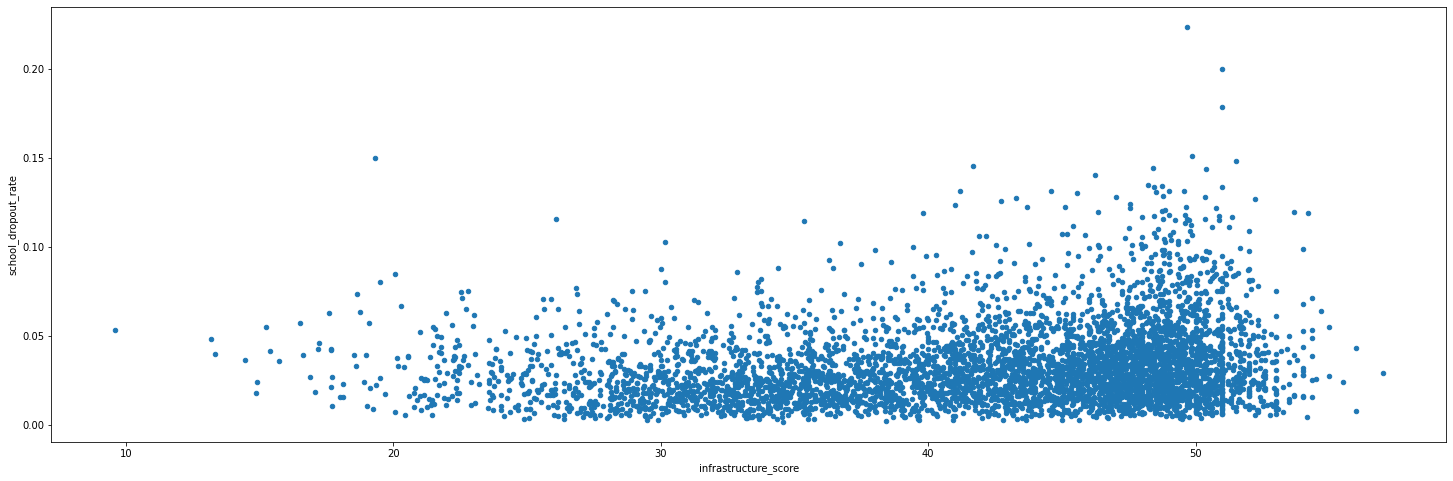

In [106]:
df_answer1.plot.scatter(x="infrastructure_score", y="school_dropout_rate", figsize=(25,8))

It doesn't seem conclusive. Let's add a linear regression trendline

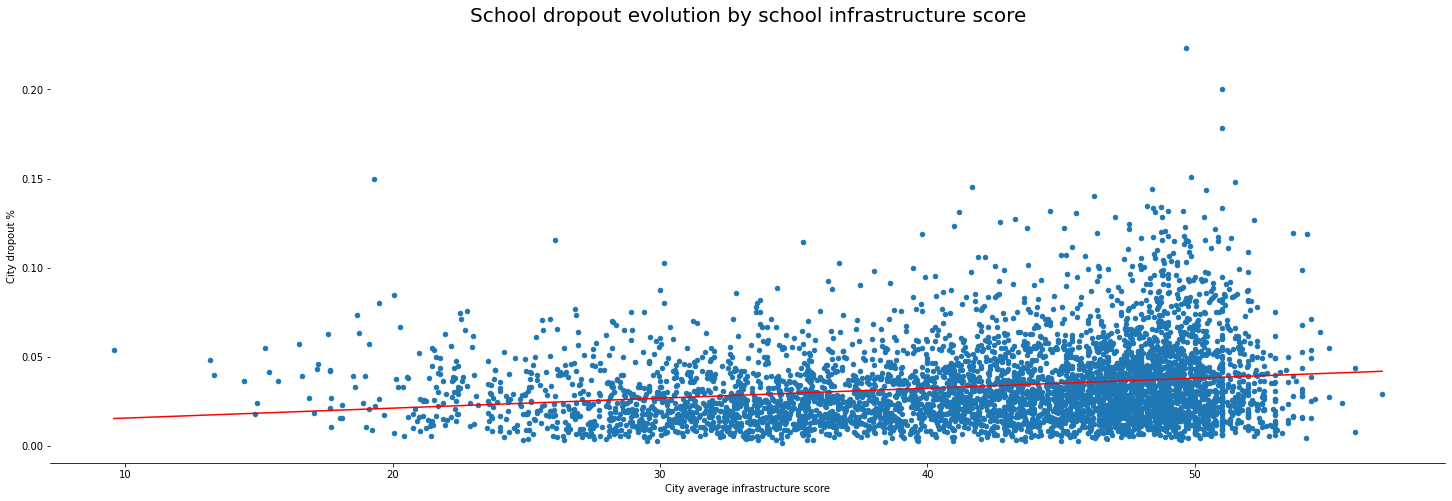

In [115]:
from sklearn.linear_model import LinearRegression

X = df_answer1["infrastructure_score"].values.reshape(-1, 1)
Y = df_answer1["school_dropout_rate"].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X) 

ax = df_answer1.plot.scatter(x="infrastructure_score", y="school_dropout_rate", figsize=(25,8), xlabel="City average infrastructure score", ylabel="City dropout %", title="School dropout evolution by school infrastructure score", grid=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title("School dropout evolution by school infrastructure score", fontdict={"fontsize": 20, "size": 20})
plt.plot(X, Y_pred, color='red')
plt.show()